# Decomposition of a Time Series

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)

## Airline Data

### Load data

In [126]:
airline = pd.read_csv('data/international-airline-passengers.csv', sep = ';', parse_dates=['Month'], index_col='Month')
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [127]:
def running_average(x, order):
    current = x[:order].sum()
    running = []
    
    for i in range(order, x.shape[0]):
        current += x[i]
        current -= x[i-order]
        running.append(current/order)
    
    return np.array(running)

In [128]:
trend = running_average(airline['Passengers'], 12)
trend

array([126.91666667, 127.58333333, 128.33333333, 128.83333333,
       129.16666667, 130.33333333, 132.16666667, 134.        ,
       135.83333333, 137.        , 137.83333333, 139.66666667,
       142.16666667, 144.16666667, 147.25      , 149.58333333,
       153.5       , 155.91666667, 158.33333333, 160.75      ,
       162.91666667, 165.33333333, 168.        , 170.16666667,
       172.33333333, 174.83333333, 176.08333333, 177.58333333,
       178.5       , 181.83333333, 184.41666667, 188.        ,
       190.08333333, 192.5       , 194.66666667, 197.        ,
       199.08333333, 200.41666667, 204.        , 208.5       ,
       212.33333333, 214.41666667, 217.25      , 219.75      ,
       222.08333333, 223.75      , 224.41666667, 225.        ,
       225.66666667, 225.        , 224.91666667, 224.25      ,
       224.66666667, 226.41666667, 229.58333333, 231.33333333,
       233.16666667, 234.66666667, 236.58333333, 238.91666667,
       242.08333333, 245.83333333, 248.5       , 252.  

In [129]:
airline.iloc[12:]

,Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [130]:
trend

array([126.91666667, 127.58333333, 128.33333333, 128.83333333,
       129.16666667, 130.33333333, 132.16666667, 134.        ,
       135.83333333, 137.        , 137.83333333, 139.66666667,
       142.16666667, 144.16666667, 147.25      , 149.58333333,
       153.5       , 155.91666667, 158.33333333, 160.75      ,
       162.91666667, 165.33333333, 168.        , 170.16666667,
       172.33333333, 174.83333333, 176.08333333, 177.58333333,
       178.5       , 181.83333333, 184.41666667, 188.        ,
       190.08333333, 192.5       , 194.66666667, 197.        ,
       199.08333333, 200.41666667, 204.        , 208.5       ,
       212.33333333, 214.41666667, 217.25      , 219.75      ,
       222.08333333, 223.75      , 224.41666667, 225.        ,
       225.66666667, 225.        , 224.91666667, 224.25      ,
       224.66666667, 226.41666667, 229.58333333, 231.33333333,
       233.16666667, 234.66666667, 236.58333333, 238.91666667,
       242.08333333, 245.83333333, 248.5       , 252.  

In [131]:
detrended = airline.iloc[12:].values.flatten()/trend
detrended

array([0.90610637, 0.98758981, 1.0987013 , 1.04786546, 0.96774194,
       1.14322251, 1.28625473, 1.26865672, 1.16319018, 0.97080292,
       0.82708585, 1.00238663, 1.01992966, 1.04046243, 1.20882852,
       1.08969359, 1.12052117, 1.14163549, 1.25684211, 1.23794712,
       1.12941176, 0.97983871, 0.86904762, 0.9755142 , 0.99226306,
       1.02955195, 1.09607194, 1.01923979, 1.02521008, 1.19890009,
       1.24717578, 1.28723404, 1.09951776, 0.99220779, 0.88356164,
       0.98477157, 0.98451235, 0.97796258, 1.15686275, 1.12709832,
       1.07849294, 1.13330742, 1.21518987, 1.23777019, 1.06716698,
       0.94301676, 0.80207947, 0.89333333, 0.90398818, 0.83555556,
       1.04483142, 1.0122631 , 1.04154303, 1.1659919 , 1.3154265 ,
       1.26657061, 1.11079342, 0.97585227, 0.85804861, 0.9584932 ,
       0.99965577, 0.94779661, 1.07444668, 1.06746032, 1.05882353,
       1.21504339, 1.37661519, 1.29036257, 1.14146341, 0.98887218,
       0.84668056, 0.97887324, 0.98782609, 0.95134516, 1.07336

Text(0, 0.5, 'Detrended value')

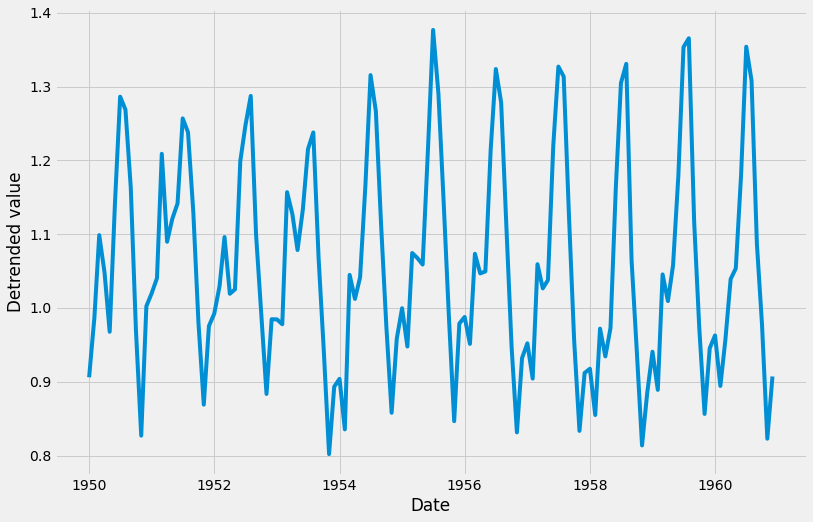

In [132]:
fig, ax = plt.subplots(1, 1)
ax.plot(airline.index[12:], detrended)
ax.set_xlabel('Date')
ax.set_ylabel('Detrended value')

In [133]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors

['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

In [135]:
N = len(detrended)
N

132

In [140]:
detrended[0::12]

array([0.90610637, 1.01992966, 0.99226306, 0.98451235, 0.90398818,
       0.99965577, 0.98782609, 0.95214106, 0.91767881, 0.94076655,
       0.96286319])

In [138]:
data = np.array([detrended[i::12] for i in range(12)])
data

array([[0.90610637, 1.01992966, 0.99226306, 0.98451235, 0.90398818,
        0.99965577, 0.98782609, 0.95214106, 0.91767881, 0.94076655,
        0.96286319],
       [0.98758981, 1.04046243, 1.02955195, 0.97796258, 0.83555556,
        0.94779661, 0.95134516, 0.90435653, 0.85503025, 0.88908146,
        0.89439573],
       [1.0987013 , 1.20882852, 1.09607194, 1.15686275, 1.04483142,
        1.07444668, 1.07336343, 1.0592611 , 0.97202954, 1.04549356,
        0.9560753 ],
       [1.04786546, 1.08969359, 1.01923979, 1.12709832, 1.0122631 ,
        1.06746032, 1.04682274, 1.02654867, 0.93443723, 1.00934579,
        1.03906837],
       [0.96774194, 1.12052117, 1.02521008, 1.07849294, 1.04154303,
        1.05882353, 1.04950495, 1.03775883, 0.97297297, 1.05771249,
        1.05357143],
       [1.14322251, 1.14163549, 1.19890009, 1.13330742, 1.1659919 ,
        1.21504339, 1.21461434, 1.2193595 , 1.16258352, 1.17950854,
        1.18036404],
       [1.28625473, 1.25684211, 1.24717578, 1.21518987, 1.

In [142]:
counts = [0]
counts

[0]

In [144]:
counts.extend([len(data[i]) for i in range(12)])
counts

[0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [146]:
counts = np.cumsum(counts)
counts

array([  0,  11,  33,  66, 110, 165, 231, 308, 396, 495, 605, 726, 858],
      dtype=int32)

In [72]:
airline.dtypes

Passengers    int64
dtype: object

In [73]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### Plot data

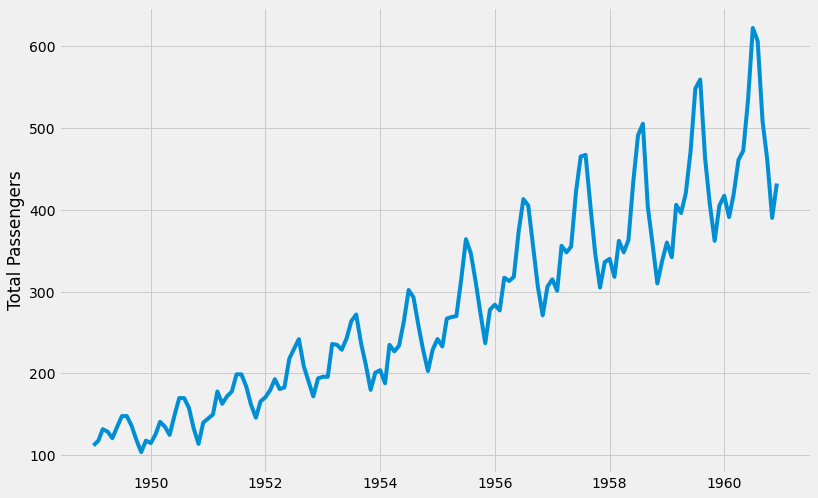

In [74]:
fig, ax = plt.subplots()
ax.plot(airline)
ax.set_ylabel('Total Passengers');

### Moving Average

In [154]:
airline['MovingAverage'] = airline.rolling(13).mean()
airline.head(20)

,Passengers,MovingAverage,Detrended
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,NaN,NaN
1949-08-01,148,NaN,NaN
1949-09-01,136,NaN,NaN


We identify the trending behavior by taking a running average.

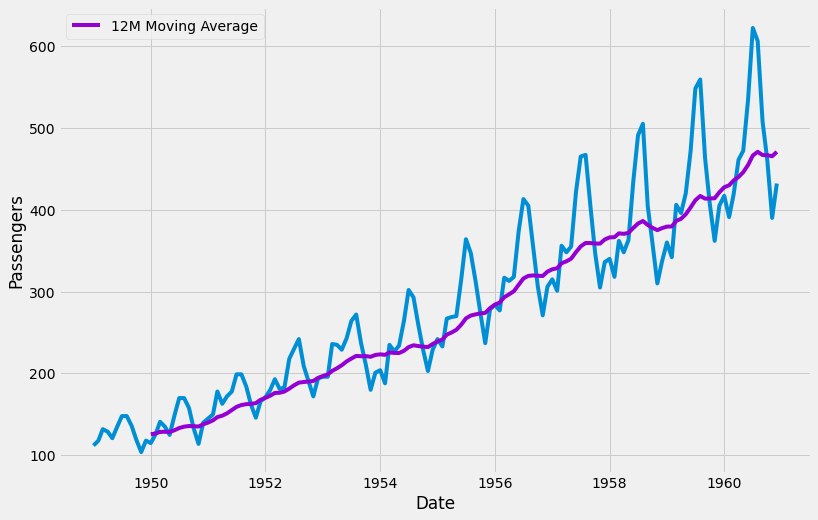

In [155]:
fig, ax = plt.subplots(1, 1)
ax.plot(airline.index, airline['Passengers'])
ax.plot(airline.index, airline['MovingAverage'], label='12M Moving Average', color='darkviolet')

ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
ax.legend()

We move on to the next step of detrending the data by dividing by the trend

In [156]:
airline['Detrended'] = airline.Passengers/airline.MovingAverage
airline.head(30)

,Passengers,MovingAverage,Detrended
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,NaN,NaN
1949-08-01,148,NaN,NaN
1949-09-01,136,NaN,NaN


Text(0, 0.5, 'Detrended Value')

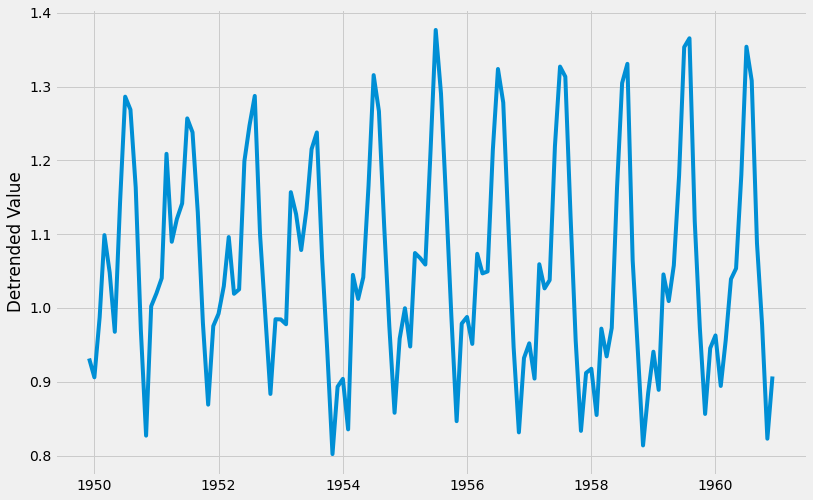

In [80]:
fig, ax = plt.subplots(1, 1)
ax.plot(airline.index, airline.Detrended)
ax.set_ylabel('Detrended Value')

### Seasonality

There's also a clear seasonal pattern. We identify the period by inspection of the plot. A simple way of making sure that we have the correct pattern is to generate a "seasonal subplots" figure.

In [ ]:
def plot_seasons(detrended, order, plot_mean = True):
    

In [157]:
N = len(airline)
N

144

In [158]:
np.mean(airline)

Passengers       280.298611
MovingAverage    278.030303
Detrended          1.060992
dtype: float64

In [159]:
airline

,Passengers,MovingAverage,Detrended
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,470.692308,1.287465
1960-09-01,508,466.769231,1.088332
1960-10-01,461,466.615385,0.987966


In [160]:
airline['MonthValue'] = airline.index.month
airline

,Passengers,MovingAverage,Detrended,MonthValue
Month,,,,
1949-01-01,112,NaN,NaN,1
1949-02-01,118,NaN,NaN,2
1949-03-01,132,NaN,NaN,3
1949-04-01,129,NaN,NaN,4
1949-05-01,121,NaN,NaN,5
...,...,...,...,...
1960-08-01,606,470.692308,1.287465,8
1960-09-01,508,466.769231,1.088332,9
1960-10-01,461,466.615385,0.987966,10


In [199]:
df = (airline
 .loc[:,['MonthValue','Detrended']]
 .groupby('MonthValue')
 .agg(['mean', 'median'])
 .droplevel(axis=1, level=0)
)
df

,mean,median
MonthValue,,
1,0.971810,0.975526
2,0.949148,0.965264
3,1.074440,1.078956
4,1.044270,1.047727
5,1.048615,1.058372
6,1.174089,1.171663
7,1.290811,1.300431
8,1.276053,1.281466
9,1.111514,1.110176


In [200]:
df.columns

Index(['mean', 'median'], dtype='object')

MonthValue
1     0.971810
2     0.949148
3     1.074440
4     1.044270
5     1.048615
6     1.174089
7     1.290811
8     1.276053
9     1.111514
10    0.978793
11    0.857244
12    0.955122
Name: mean, dtype: float64

In [205]:
df['mean']

MonthValue
1     0.971810
2     0.949148
3     1.074440
4     1.044270
5     1.048615
6     1.174089
7     1.290811
8     1.276053
9     1.111514
10    0.978793
11    0.857244
12    0.955122
Name: mean, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (12,) and (1,)

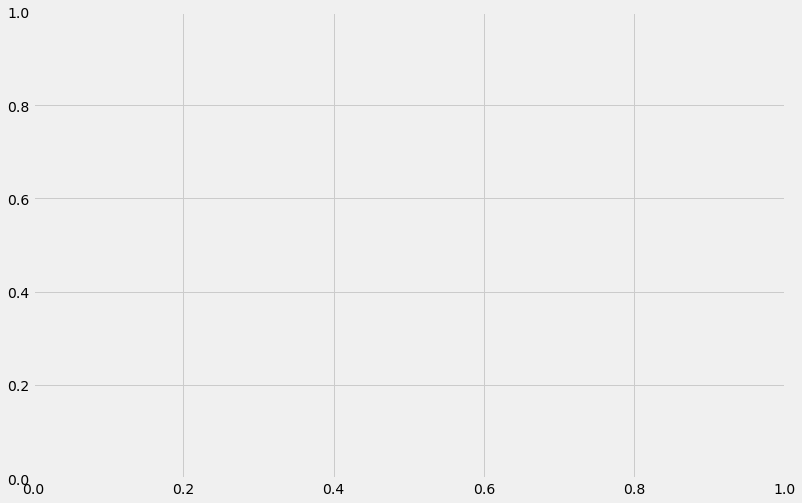

In [202]:
fig, ax = plt.subplots(1, 1)
ax.plot(df.index, df.mean)
ax.set_ylabel('Detrended Value')

(1, Detrended  mean      0.971810
           median    0.975526
Name: 1, dtype: float64)
(2, Detrended  mean      0.949148
           median    0.965264
Name: 2, dtype: float64)
(3, Detrended  mean      1.074440
           median    1.078956
Name: 3, dtype: float64)
(4, Detrended  mean      1.044270
           median    1.047727
Name: 4, dtype: float64)
(5, Detrended  mean      1.048615
           median    1.058372
Name: 5, dtype: float64)
(6, Detrended  mean      1.174089
           median    1.171663
Name: 6, dtype: float64)
(7, Detrended  mean      1.290811
           median    1.300431
Name: 7, dtype: float64)
(8, Detrended  mean      1.276053
           median    1.281466
Name: 8, dtype: float64)
(9, Detrended  mean      1.111514
           median    1.110176
Name: 9, dtype: float64)
(10, Detrended  mean      0.978793
           median    0.983482
Name: 10, dtype: float64)
(11, Detrended  mean      0.857244
           median    0.850493
Name: 11, dtype: float64)
(12, Detrended  m

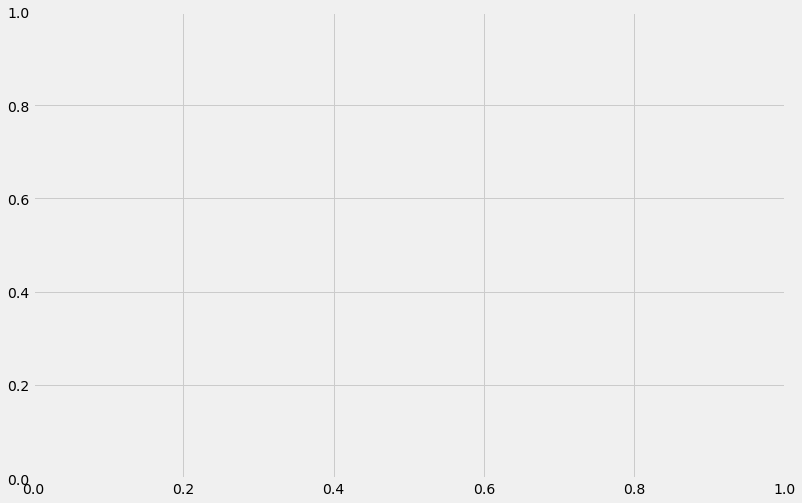

In [195]:
fig, ax = plt.subplots(1, 1)

for i in df.loc[:,]iterrows():
    print(i)
    

<BarContainer object of 1 artists>

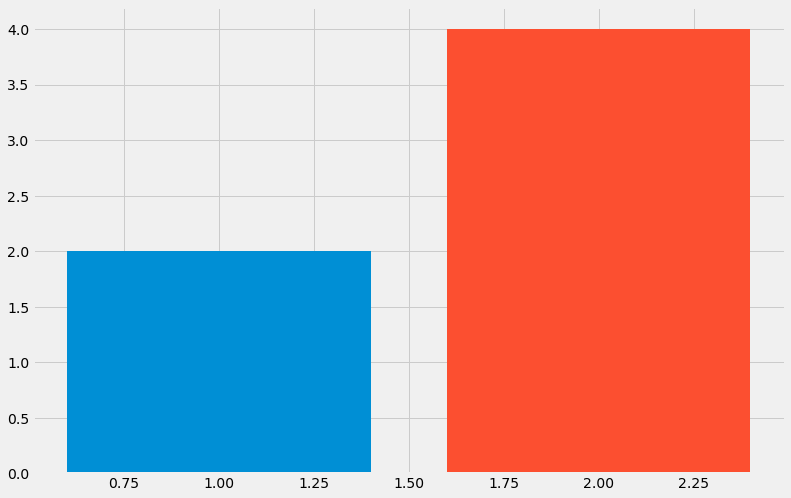

In [192]:
fig, ax = plt.subplots(1, 1)
ax.bar(1,2)
ax.bar(2,4)